<a href="https://colab.research.google.com/github/zoizupas/fastai_minst/blob/main/Minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
import fastbook
from fastbook import *
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.MNIST)
dls = ImageDataLoaders.from_folder(path , train='training',valid='testing')


In [ ]:
learn = cnn_learner(dls,resnet18,pretrained=False,loss_func=LabelSmoothingCrossEntropy(),metrics=accuracy)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
learn.fit_one_cycle(1,0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.562305,0.528594,0.989700,01:19


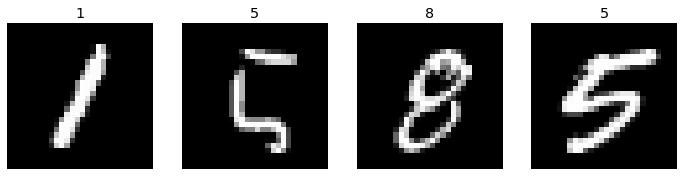

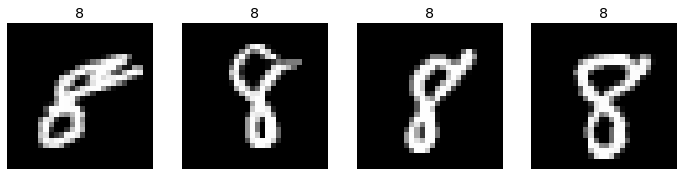

In [ ]:
dls.train.show_batch(max_n=4,nrows=1)
dls.valid.show_batch(max_n=4,nrows=1)

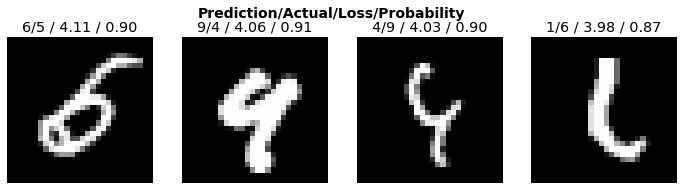

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(4,nrows=1)

In [ ]:
learn.summary()

Sequential (Input shape: 64 x 3 x 28 x 28)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 14 x 14   
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 7 x 7     
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                        

In [ ]:
learn.path = Path(os.getcwd())
learn.export()